# RSE Group Leaders Survey 2023

In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

sys.path.append('../src/data/')
import util as util

# set verbose to True to see more details of the processing
verbose = True

# set the bacground for all figures 
plt.rcParams['figure.facecolor'] = 'white'

color_bars = 'tab:blue'
color_scatter = 'tab:blue'

In [2]:
setup, dset, dset_gnames = util.read_setup_and_data()
validated = util.validate_setup_and_data(setup, dset)
dset = util.rename_groups(dset, dset_gnames)

if not validated:
    print("ERROR: setup and data files are not valid.")
    raise KeyboardInterrupt

# number of respondents and questions
nrsps_raw = dset.shape[0]
nqsts = dset.shape[1]

# replace dset columns with setup keys
dset.columns = setup.keys()

# remove respondents who did not agree to share data
dset = dset[dset.q1 == "Yes"]
nrsps = dset.shape[0]

# process the text and checkbox responses
dset = util.preprocess_text(dset, setup, verbose=verbose)
dset = util.preprocess_checkboxes(dset, setup, verbose=verbose)

# save the processed dataset
util.save_dataset(dset)

# print out some information
print()
print(f"Questions  : {nqsts}")
print(f"Respondents - all           : {nrsps_raw}")
print(f"Respondents - agreed sharing: {nrsps}")



Preprocessing text responses to
- fill empty cells with ''
- replace new line characters with spaces

Preprocessing checkbox responses to
- fill empty cells with ''
- replace ( with - and ) with ''
- create extra columns for each option, including Other if it exists

Questions  : 20
Respondents - all           : 36
Respondents - agreed sharing: 36


## Overview of the answers


Q4: Is your group
                                                                                      count  percentage
The main RSE Group for the university/research organisation                              26          72
An RSE Group for a specific subset/group within the university/research organisation      8          22
An RSE Group for multiple universities/research organisations                             4          11
Saved q4_stats to q4_stats.csv


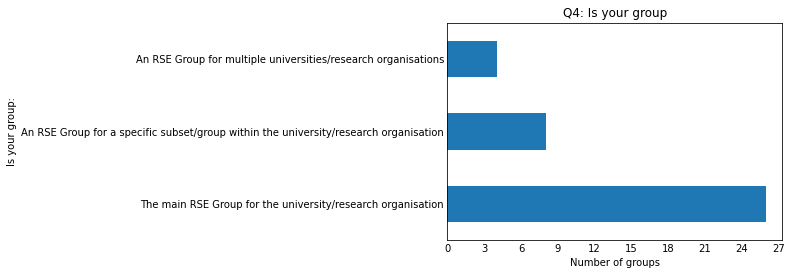


Q5: What is your position in the RSE Group?
                                                                             count
Head of RSE                                                                      7
Director                                                                         3
Head of Research Software Engineering                                            3
Research Software Engineer                                                       3
Team Lead                                                                        1
I am the academic director of the facility in which the RSE group is hosted      1
Principal Architect (i.e. Senior RSE)                                            1
Sole Member / Lead                                                               1
Group Leader                                                                     1
RSE team leader                                                                  1
Manage the Research It Team               

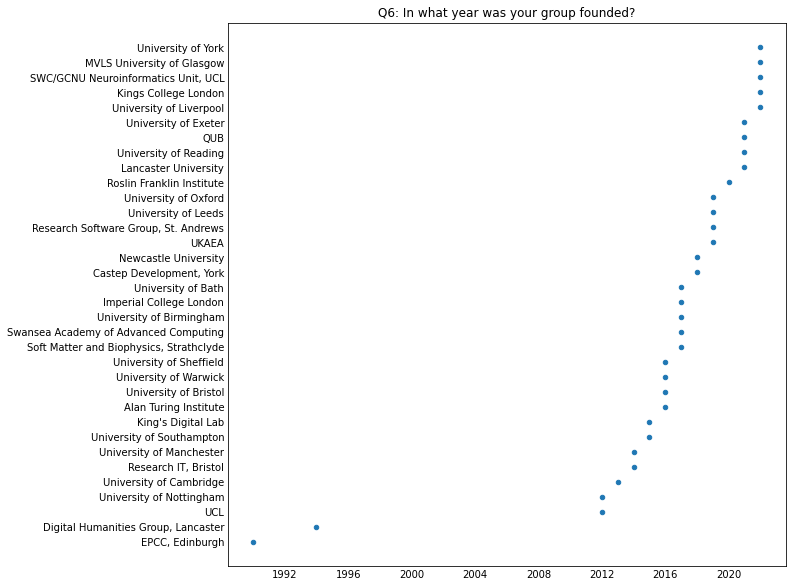

Saved q6_scatter to q6_scatter.csv

Q7: Where is your group based?
                                                    count  percentage
IT/Research IT                                         14          39
Other                                                   9          25
Academic Department - supporting whole Institution      5          14
Academic Department - supporting a specific domain      4          11
Independent Institute/Facility                          4          11
Saved q7_stats to q7_stats.csv


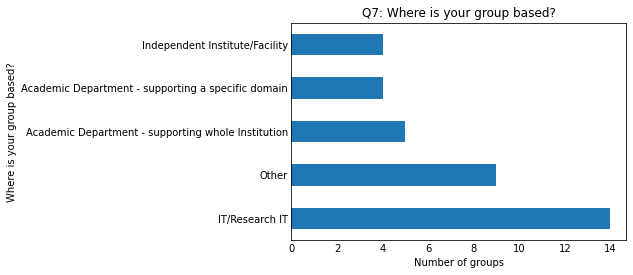


Q8: How many people were in your group when it started?


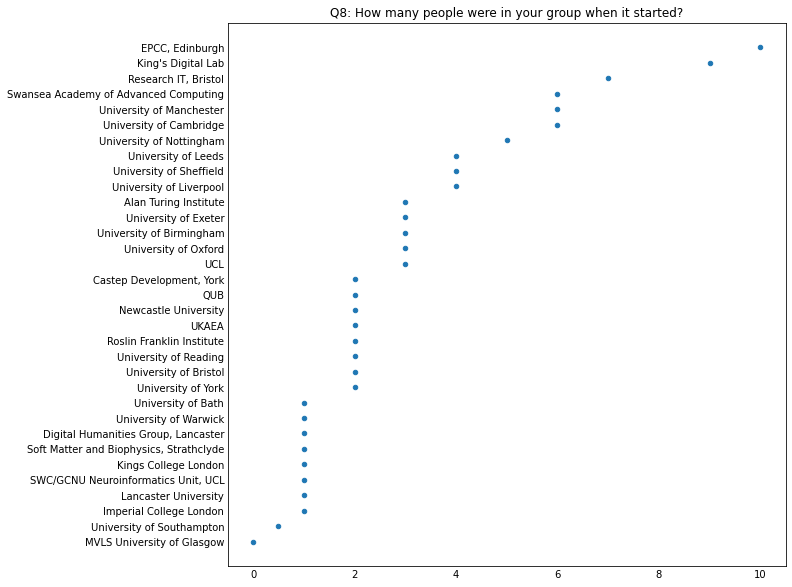

Saved q8_scatter to q8_scatter.csv

Q9: How many people are currently in your group in total?


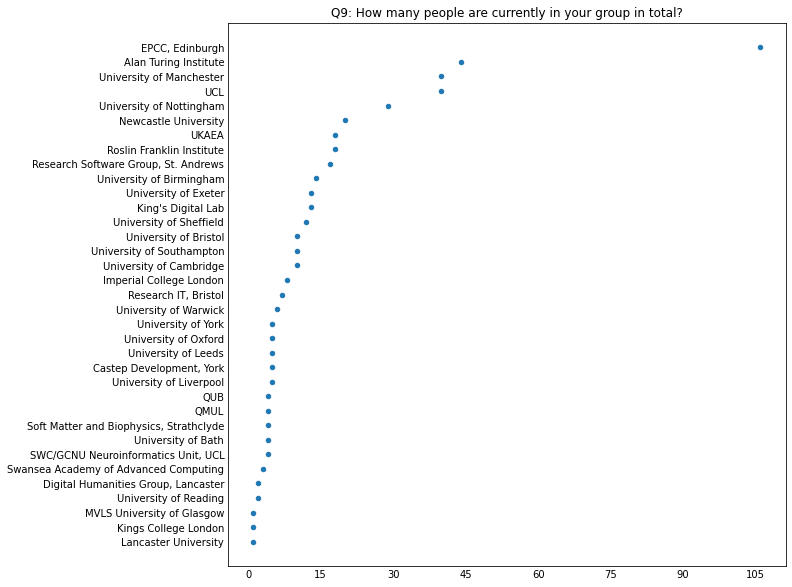

Saved q9_scatter to q9_scatter.csv

Q10: How many people in your group are in a more senior role than a standard RSE (i.e. typically receiving greater pay than a postdoctoral researcher)?


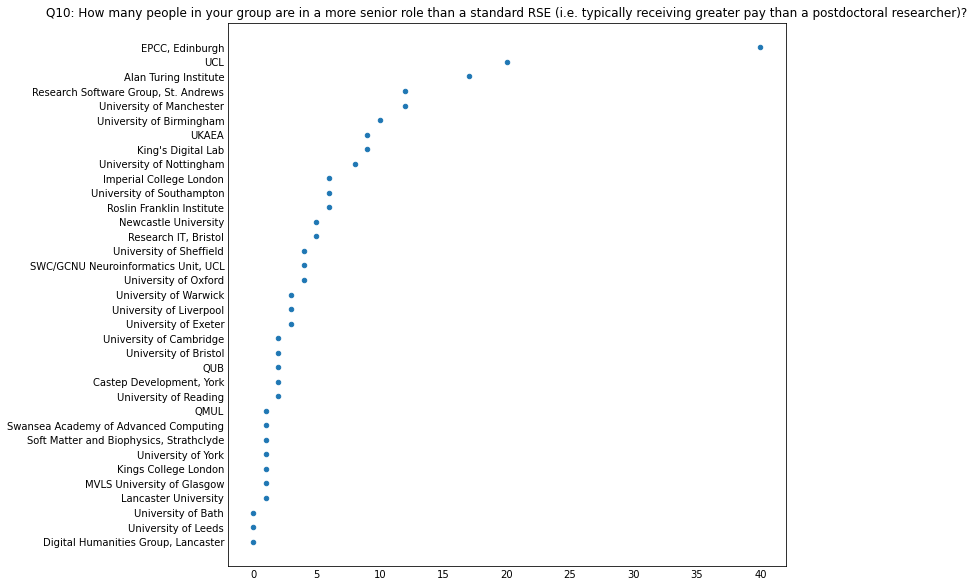

Saved q10_scatter to q10_scatter.csv

Q11: How many people in your group are in a less senior role than a standard RSE (e.g. a junior RSE)?


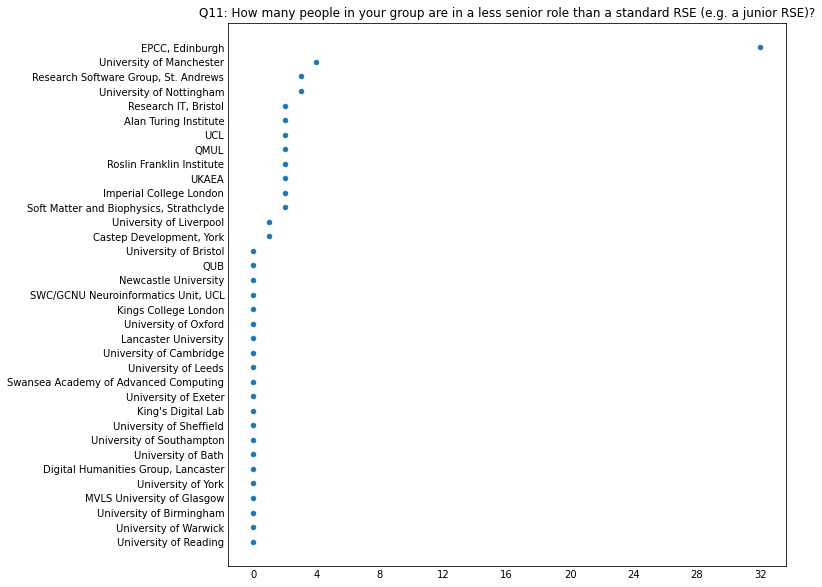

Saved q11_scatter to q11_scatter.csv

Q12: How many staff have left your group in the last two years?


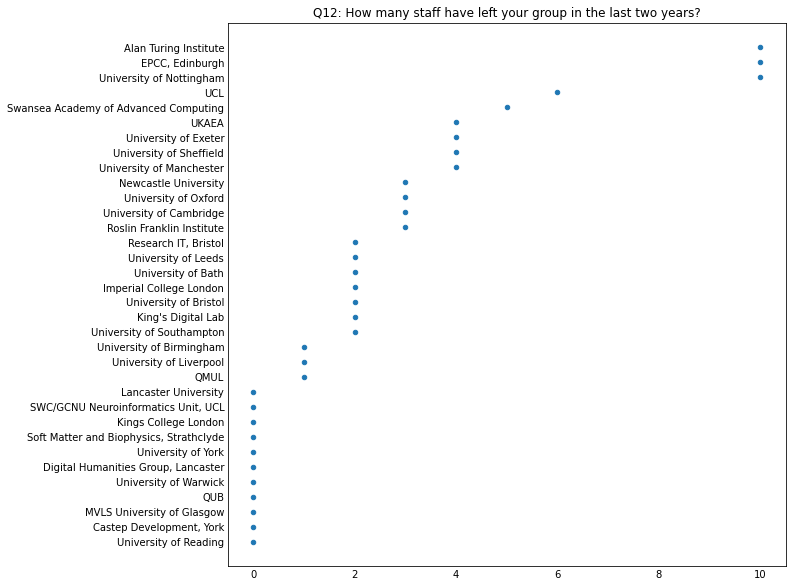

Saved q12_scatter to q12_scatter.csv

Q13: Where did those staff go?
Saved q13_answers to q13_answers.csv


|                                         |                                                                                                                                                                                                                                                                                                                         |
|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Imperial College London                 | 1: industry, 1: an embedded RSE team within Imperial (after a break)                                                                                                                                                                                                                                                    |
| Newcastle University                    | One to industry, two to other institutions                                                                                                                                                                                                                                                                              |
| SWC/GCNU Neuroinformatics Unit, UCL     |                                                                                                                                                                                                                                                                                                                         |
| Kings College London                    |                                                                                                                                                                                                                                                                                                                         |
| University of Oxford                    | 1) Senior Lecturer position 2) position in industry 3) promotion to Senior RSE (+permanent)                                                                                                                                                                                                                             |
| Alan Turing Institute                   | 1 internal move to domain-focussed data science team at Turing. 2 to MSc/PhD. 2 to academic PDRA/Lecturer. 5 to RSE/Data Science roles in industry. One academic and one industry moves were to more senior roles, the rest of them were lateral moves (including 2 shortly after promotion to Senior within the team). |
| University of Cambridge                 | research in Europe (2x), industry (1x)                                                                                                                                                                                                                                                                                  |
| University of Leeds                     | One became a teaching fellow in the School of Computing, the other moved to industry                                                                                                                                                                                                                                    |
| UCL                                     | 1 postdoc, 3 industry (1 SE, 1 training, 1 RSE-like), 1 research institute, 1 uni spin-out; 3 moved country                                                                                                                                                                                                             |
| Research Software Group, St. Andrews    |                                                                                                                                                                                                                                                                                                                         |
| QUB                                     |                                                                                                                                                                                                                                                                                                                         |
| University of Exeter                    | 3 left to industry, 1 transferred to a sys admin role in the university                                                                                                                                                                                                                                                 |
| University of Sheffield                 | Industry x 2, Other groups/roles x2                                                                                                                                                                                                                                                                                     |
| QMUL                                    |                                                                                                                                                                                                                                                                                                                         |
| University of Bath                      | Industry (2)                                                                                                                                                                                                                                                                                                            |
| Castep Development, York                |                                                                                                                                                                                                                                                                                                                         |
| Roslin Franklin Institute               | One left for industry + pay rise + more convenient commute One left as they did not complete probation One left for a similar level RSE role with similar pay in an area of the country they preferred.                                                                                                                 |
| University of Reading                   |                                                                                                                                                                                                                                                                                                                         |
| UKAEA                                   | Position in industry: 2 Different research position at another institution: 1 Different internal research position: 1                                                                                                                                                                                                   |
| University of Nottingham                | 6 to industry, 1 to NHS, 1 to further study, 1 transferred to Central IT team, 1 unknown                                                                                                                                                                                                                                |
| University of Birmingham                | Position in industry                                                                                                                                                                                                                                                                                                    |
| University of Warwick                   |                                                                                                                                                                                                                                                                                                                         |
| University of Manchester                | 1x internal move, 1x another University, 2x industry                                                                                                                                                                                                                                                                    |
| University of Bristol                   | One left to become Head of RSE at another University. Another left for a good position in industry.                                                                                                                                                                                                                     |
| King's Digital Lab                      | One did not go to new position; one went to position in industry                                                                                                                                                                                                                                                        |
| MVLS University of Glasgow              |                                                                                                                                                                                                                                                                                                                         |
| The Open University                     |                                                                                                                                                                                                                                                                                                                         |
| University of York                      |                                                                                                                                                                                                                                                                                                                         |
| Digital Humanities Group, Lancaster     |                                                                                                                                                                                                                                                                                                                         |
| University of Liverpool                 | retire                                                                                                                                                                                                                                                                                                                  |
| University of Southampton               | One became head of Kings RSE Group the other is going to the Warwick RSE Group                                                                                                                                                                                                                                          |
| Swansea Academy of Advanced Computing   | 1 to industry, 1 to be RSE another project in the university, three to other institutions' RSE teams                                                                                                                                                                                                                    |
| Soft Matter and Biophysics, Strathclyde |                                                                                                                                                                                                                                                                                                                         |
| Lancaster University                    |                                                                                                                                                                                                                                                                                                                         |
| EPCC, Edinburgh                         |                                                                                                                                                                                                                                                                                                                         |
| Research IT, Bristol                    | Not RSEs  - 1 sysadmin left for promotion internally, 1 facilitator left for promotion externally as BA                                                                                                                                                                                                                 |


Q14: How many new RSEs positions have been added to your group in the last two years?


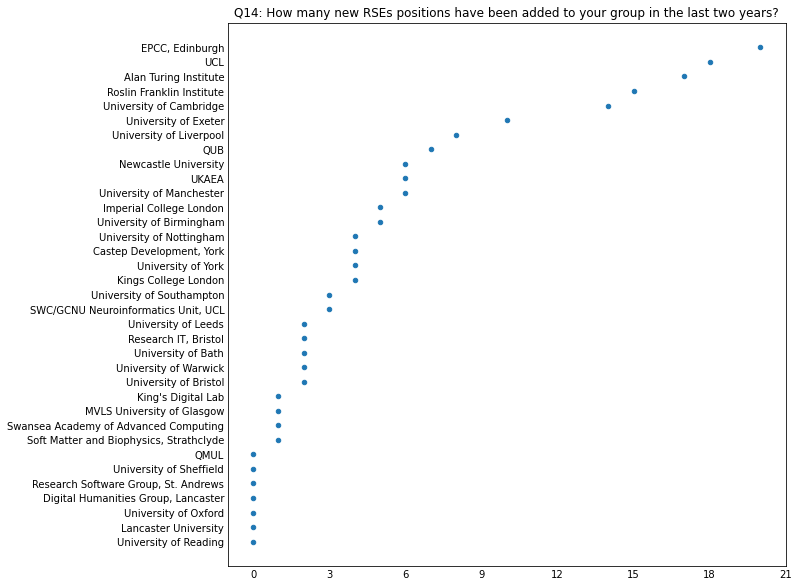

Saved q14_scatter to q14_scatter.csv

Q15: Please rate the level of demand for your Group's services
                                                      count  percentage
Demand greater than the number of RSEs                   17          47
Demand significantly greater than the number of RSEs     14          39
Demand is met by the number of RSEs                       4          11
Demand is less than the number of RSEs                    0           0
Demand is significantly less than the number of RSEs      0           0
Saved q15_stats to q15_stats.csv


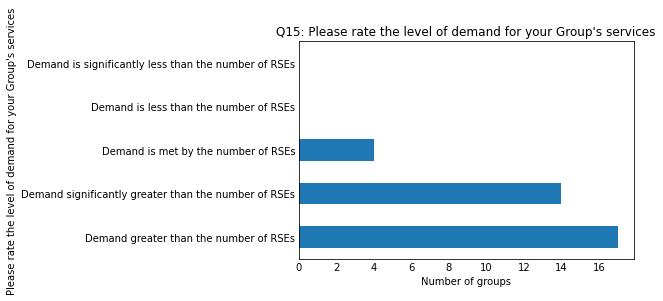


Q16: If demand for your services outstrips the number of RSEs, what causes this situation?
                                                                                                                 count  percentage
Hiring processes are long-winded, so we're always behind the demand curve                                           21          58
We lack the funding to make new positions available                                                                 12          33
We can attract RSEs, but can't hire them because the salary and other benefits we can offer are not competitive      9          25
We have funding, but we can't find RSEs to hire                                                                      7          19
Saved q16_stats to q16_stats.csv


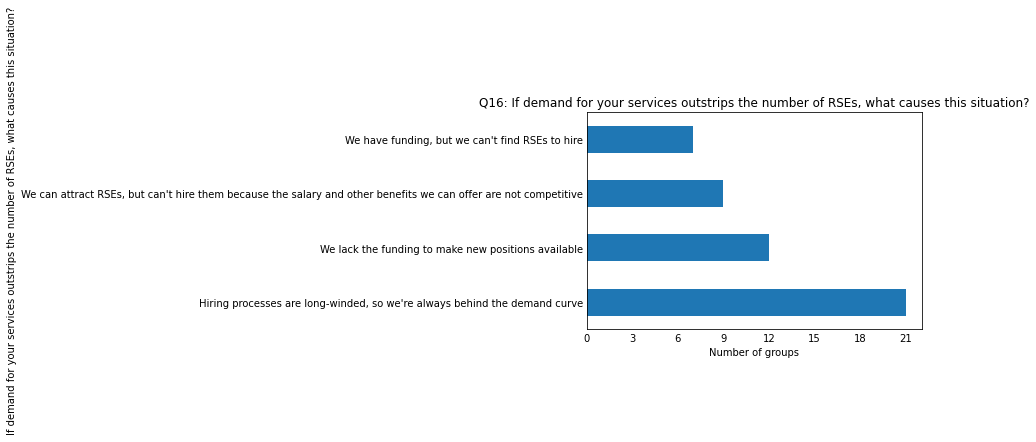

In [3]:
from IPython.display import display, Markdown

col_inst = "q3"

for qst in setup.keys():
    if qst in ["q1", "q2", "q3", "q17", "q18", "q19", "q20"]:
        continue
    title = f"{qst.upper()}: {setup[qst]['text'].replace(':', '')}"
    print(f"\n{title}")
    if setup[qst]['type'] == 'checkbox':
        # plot bar chart for counts of each answer option
        dset_stats = util.derive_checkbox_stats(dset, setup, qst)
        pd.set_option('precision', 0)
        print(dset_stats.to_string())

        # save stats
        fname = f"{qst}_stats"
        dset_stats.index.name = setup[qst]["text"]
        util.save_dataset(dset_stats, f"{qst}_stats")
        if verbose:
            print(f"Saved {fname} to {fname}.csv")

        # plot stats
        dset_stats.plot.barh(y='count', 
                             color=color_bars,
                             legend=False, 
                             title=title
                             )
        plt.xlabel("Number of groups")
        plt.tick_params(axis="both", which="major", length=0)
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show()

        
       
    elif setup[qst]['type'] == 'number':
        # plot scatter plot of sorted values
        cols = ["q3", qst]
        dset2plot = dset[cols].copy()   
        dset2plot = dset2plot.sort_values(by=qst)
        dset2plot = dset2plot.dropna(subset=[qst])
        dset2plot.plot.scatter(x=qst, 
                               y='q3', 
                               xlabel="",
                               ylabel="",
                               color=color_scatter,
                               title=title)
        # set the height of the figure to 10
        plt.gcf().set_size_inches(10, 10)
        plt.tick_params(axis="both", which="major", length=0)
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show()
        
        # save dataset
        fname = f"{qst}_scatter"
        cols = [setup[col]["text"] for col in cols] 
        dset2plot.columns = cols  
        dset2plot.set_index(cols, inplace=True)
        util.save_dataset(dset2plot, fname)
        if verbose:
            print(f"Saved {fname} to {fname}.csv")
        
    elif setup[qst]['type'] == 'text':
        if qst == "q5":
            # What is your position in the RSE Group?
            dset_stats = dset[qst].value_counts().to_frame(name='count')
            print(dset_stats.to_string())

            # save stats
            fname = f"{qst}_stats_count"
            dset_stats.index.name = setup[qst]["text"]
            util.save_dataset(dset_stats, fname)
            if verbose:
                print(f"Saved {fname} to {fname}.csv")
        else:
            # print the values in the qst column
            dset2print = dset[[col_inst, qst]].copy()
            dset2print.set_index(col_inst, inplace=True)
            # replace the nan with empty string
            dset2print = dset2print.fillna('')
            dset2print.index.name = setup[dset2print.index.name]["text"]
            dset2print.columns = [setup[dset2print.columns[0]]["text"]]
            # save dataset
            fname = f"{qst}_answers"
            util.save_dataset(dset2print, fname)
            if verbose:
                print(f"Saved {fname} to {fname}.csv")

            # display dataset
            dset2print.index.name = None
            dset2print.columns = [""]
            display(Markdown(dset2print.to_markdown(tablefmt="github")))


## Q17: Roughly what percentage of your roles are open-ended/permanent?

Q17: Roughly what percentage of your roles are open-ended/permanent?

Preprocessing prior to number conversion
- dropped empty values
- replace All with 100%
- replace values with the first number found in string
- replace 50/50 with 50%
- find the first number in the string (if any) and restrict the answer to that
- convert to numeric as integers
Saved q17_stats to q17_stats.csv


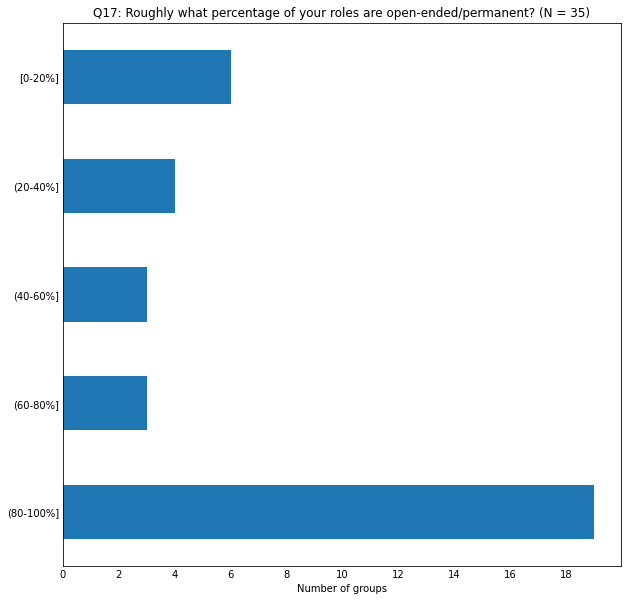

In [25]:
qst = "q17"
title = f"{qst.upper()}: {setup[qst]['text']}"

print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)

if verbose:
    print()
    print("Preprocessing prior to number conversion")
    print("- dropped empty values")
    print("- replace All with 100%")
    print("- replace values with the first number found in string")
    print("- replace 50/50 with 50%")
    print("- find the first number in the string (if any) and restrict the answer to that")
    print("- convert to numeric as integers")

dset2plot = dset2plot[dset2plot[qst] != ""]
dset2plot[qst] = dset2plot[qst].str.replace("All", "100%")
dset2plot[qst] = dset2plot[qst].str.replace("50/50", "50%")
dset2plot[qst] = dset2plot[qst].str.extract("(\d+)", expand=False)
dset2plot[qst] = pd.to_numeric(dset2plot[qst], errors="coerce").astype("int")

# bin the qst column in bins with specific bounds
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=["[0-20%]", "(20-40%]", "(40-60%]", "(60-80%]", "(80-100%]"],
                           include_lowest=True)

# save data
fname = f"{qst}_stats"
util.save_dataset(dset2plot, fname=fname)
if verbose:
    print(f"Saved {fname} to {fname}.csv")

# compute and plot stats 
col = "Number of groups"
dset_stats = dset2plot[column].value_counts().to_frame(name=col)
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Percentage of open-ended/permanent staff"

dset_stats.plot.barh(y=col, 
                     legend=False, 
                     color=color_bars,
                     title=f"{title} (N = {dset2plot.shape[0]})"
                     )
plt.xlabel(col)
plt.ylabel("")
plt.tick_params(axis="both", which="major", length=0)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gcf().set_size_inches(10, 10)

plt.show()


## Q18: Does your Group have a cost recovery target? If so, what is that cost recovery target?

Q18: Does your Group have a cost recovery target? If so, what is that cost recovery target?

Preprocessing responses to
- drop the empty rows
- replace values with 0 if they start witn No
- replace values with 100 if they start witn All/Most
- find the first number in the string (if any) and restrict the answer to that
- convert to numeric as integers
Saved q18_stats to q18_stats.csv


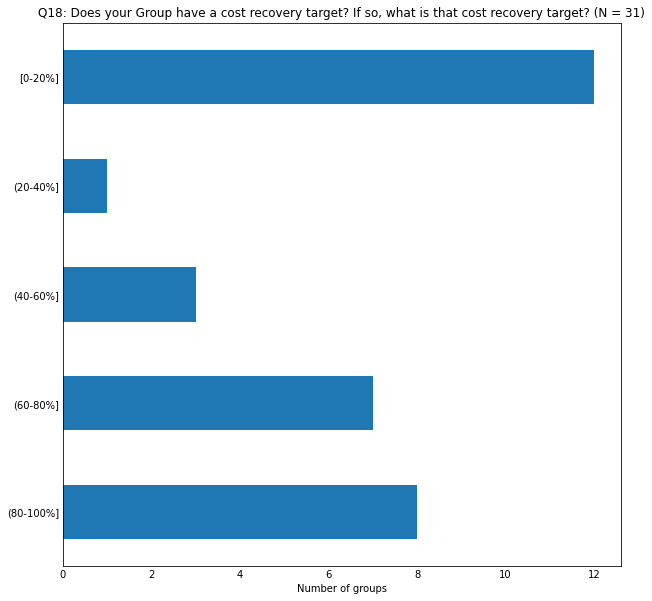

In [26]:
qst = "q18"
title = f"{qst.upper()}: {setup[qst]['text'].replace(':', '')}"
print(title)

dset2plot = dset.copy()

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the empty rows")
    print("- replace values with 0 if they start witn No")
    print("- replace values with 100 if they start witn All/Most")
    print("- find the first number in the string (if any) and restrict the answer to that")
    print("- convert to numeric as integers")

dset2plot = dset2plot[dset2plot[qst] != ""] 
dset2plot.loc[dset2plot[qst].str.startswith("No"), qst] = "0"
dset2plot.loc[dset2plot[qst].str.startswith("All"), qst] = "100"
dset2plot.loc[dset2plot[qst].str.startswith("Most"), qst] = "100"
dset2plot[qst] = dset2plot[qst].str.extract("(\d+)", expand=False)
dset2plot[qst] = pd.to_numeric(dset2plot[qst], errors="coerce").astype("int")

# bin the qst column in bins with specific bounds
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=["[0-20%]", "(20-40%]", "(40-60%]", "(60-80%]", "(80-100%]"],
                           include_lowest=True)

# save data
fname = f"{qst}_stats"
util.save_dataset(dset2plot, fname=fname)
if verbose:
    print(f"Saved {fname} to {fname}.csv")

# compute and plot stats 
col = "Number of groups"
dset_stats = dset2plot[column].value_counts().to_frame(name=col)
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Percentage of open-ended/permanent staff"

dset_stats.plot.barh(y=col, 
                     legend=False, 
                     color=color_bars,
                     title=f"{title} (N = {dset2plot.shape[0]})"
                     )
plt.xlabel(col)
plt.ylabel("")
plt.tick_params(axis="both", which="major", length=0)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gcf().set_size_inches(10, 10)

plt.show()

## Q19: Roughly what percentage of your group's time is spent on free at point of use activities. e.g. Training, Institutional support, free project support/consultancy.

In [27]:
qst = "q19"

title = f"{qst.upper()}: {setup[qst]['text'].replace(':', '')}"
print(title)

dset2plot = dset.copy()



Q19: Roughly what percentage of your group's time is spent on free at point of use activities. e.g. Training, Institutional support, free project support/consultancy.
